### Theory for the Neumann boundary condition

First we'll say we know the rate of growth of ice, $g_{ice} \approx 1-2 \mu m / s$. That means in terms of mass/area/time, we have 

$$
g'_{ice} = {dmass \over {A dt}} = \rho_{ice} g_{ice} \ \ \ \ (1)
$$

Now if the ice is growing, the amount of water in the air layer above the ice must be getting changed too, so 

$$
g'_{vap} = {dmass \over {A dt}} \ \ \ \ (2)
$$

The change in mass of vapor for a given volume can be expressed, with the ideal gas law, as 

$$
dmass = M_{vap} dn_{vap} = M_{vap} {V dP_{vap} \over RT} \ \ \ \ (3)
$$

so now we have

$$
g'_{vap} = {M_{vap} {V dP_{vap} \over RT} \over {A dt}} \ \ \ \ (4)
$$

Since the volume of the gas phase is $A \Delta y$, this becomes

$$
g'_{vap} = {M_{vap} {A \Delta y \ dP_{vap} \over RT} \over {A dt}}  = {M_{vap} \Delta y \over RT} {dP_{vap} \over dt}\ \ \ \ (5)
$$

Since $g'_{vap}=-g'_{ice}$, we have ${M_{vap} \Delta y \over RT} {dP_{vap} \over dt} = -\rho_{ice} g_{ice}$

$$
{\partial P_{vap} \over \partial t} =  -\rho_{ice} g_{ice}{RT \over M_{vap} \Delta y}  \ \ \ \ (6)
$$

In [1]:
import numpy as np
import matplotlib.pylab as plt
from copy import copy as cp
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import sys
sys.path.append('..')
import VFDstuff as VFD

In [2]:
%matplotlib notebook

### Functions 
The coefficients m and b below are based on a fit of data from https://www.engineeringtoolbox.com/air-diffusion-coefficient-gas-mixture-temperature-d_2010.html.

In [3]:
# Units
distance_unit = 'micrometer'
pressure_unit = 'pascal'
time_unit = 'microsecond'

# Times
#tmax = AssignQuantity(2,time_unit)
#tmax = AssignQuantity(10,time_unit)
tmax = AssignQuantity(.5,time_unit)

# Setting ice parameters
sigma0 = 0.2
print('sigma0 = ',sigma0)

# The far-field supersaturation
sigmaI_far_field = 0.3

# Temperature and pressure
Temp = AssignQuantity(240,'kelvin')
Pressure = AssignQuantity(50,'pascal')

# Converting to the desired pressure unit
Pressure.ito(pressure_unit)
print('Pressure = ', Pressure)
print('Temperature = ',Temp)

# Growth rate of the crystal
# g_icex = AssignQuantity(2,'micrometer/second')
g_icex_left = AssignQuantity(10,'micrometer/second')
g_icex_right = AssignQuantity(10,'micrometer/second')
g_icey = AssignQuantity(2,'micrometer/second')
# g_ice = AssignQuantity(5.12,'micrometer/second')
# g_ice = AssignQuantity(3.75,'micrometer/second')
# print('g_icex = ',g_icex)
print('g_icex_left = ',g_icex_left)
print('g_icex_right = ',g_icex_right)
print('g_icey = ',g_icey)

# Checking on the plausibility of this growth rate
nu_kin = VFD.get_nu_kin(Temp,AssignQuantity)
print('g_ice should be smaller than sigmaI_far_field x nu_kin ...')
print('nu_kin = ', nu_kin)
print('sigmaI_far_field x nu_kin = ', sigmaI_far_field*nu_kin)
# print('alpha_far_field = ', g_icex/(sigmaI_far_field*nu_kin))
if g_icex_left <= g_icex_right and g_icey <= g_icex_right:
    print('alpha_far_field = ', g_icex_right/(sigmaI_far_field*nu_kin))
elif g_icex_right <= g_icex_left and g_icey <= g_icex_left:
    print('alpha_far_field = ', g_icex_left/(sigmaI_far_field*nu_kin))
elif g_icex_left <= g_icey and g_icex_right <= g_icey:
    print('alpha_far_field = ', g_icey/(sigmaI_far_field*nu_kin))
else:
    print('alpha_far_field = ', g_icex_right/(sigmaI_far_field*nu_kin))

sigma0 =  0.2
Pressure =  50 pascal
Temperature =  240 kelvin
g_icex_left =  10 micrometer / second
g_icex_right =  10 micrometer / second
g_icey =  2 micrometer / second
g_ice should be smaller than sigmaI_far_field x nu_kin ...
nu_kin =  39.341788071548116 micrometer / second
sigmaI_far_field x nu_kin =  11.802536421464435 micrometer / second
alpha_far_field =  0.8472755044257868 dimensionless


In [4]:
# Box size
nx = 353
ny = 355
nx = 160
ny = 161
xmax = AssignQuantity(1000,distance_unit)
ymax = AssignQuantity(1000,distance_unit)
x = np.linspace(0,xmax,nx); dx = x[1]-x[0]; print('dx', dx)
y = np.linspace(0,ymax,ny); dy = y[1]-y[0]; print('dy',dy)
dx2 = dx**2
dy2 = dy**2
nxmid = int(nx/2); # print('nxmid =', nxmid); # print('x(nxmid) =',x[nxmid])
nymid = int(ny/2)
x = x-x[nxmid]
y = y-y[nymid]

dx 6.289308176100629 micrometer
dy 6.25 micrometer


### Diffusion coefficient
See https://acp.copernicus.org/articles/20/12569/2020/#&gid=1&pid=1 for cirrus cloud conditions
See https://www.engineeringtoolbox.com/air-diffusion-coefficient-gas-mixture-temperature-d_2010.html for Diffusion coefficient calculations

In [5]:
# Compute diffusion coefficient of water through air at this temperature
# This is using trends from engineering toolbox, with the log-log correction
D = VFD.getDofTP(Temp,Pressure,AssignQuantity); print('loglog method says D = ', D)

# Getting a suitable time step
dt = (dx2+dy2)/D/10; print('dt = ', dt)

# Computing effective diffusion coefficents - which should be dimensionless
Dxeff = D*dt/dx2; print('Dxeff = ', Dxeff)
Dxeff = Dxeff.magnitude; print('Dxeff = ', Dxeff)
Dyeff = D*dt/dy2; print('Dyeff = ', Dyeff)
Dyeff = Dyeff.magnitude; print('Dyeff = ', Dyeff)

D0 =  21.893732126411837
loglog method says D =  34908.31943863489 micrometer ** 2 / microsecond
dt =  0.00022521249546878967 microsecond
Dxeff =  0.19875390624999997 dimensionless
Dxeff =  0.19875390624999997
Dyeff =  0.20126181717495353 dimensionless
Dyeff =  0.20126181717495353


In [6]:
# Calculating the Neumann condition at the vapor/ice boundary (starting with ice density)
rho_ice = AssignQuantity(0.9,'g/cm^3')
Mvap = AssignQuantity(18,'g/mol')
R = AssignQuantity(8.314,'J/mol/kelvin')

# kappa
# kappax = rho_ice*g_icex*R*Temp/(Mvap*dy); kappax.ito(pressure_unit+'/'+time_unit)
kappax_left = rho_ice*g_icex_left*R*Temp/(Mvap*dy); kappax_left.ito(pressure_unit+'/'+time_unit)
kappax_right = rho_ice*g_icex_right*R*Temp/(Mvap*dy); kappax_right.ito(pressure_unit+'/'+time_unit)
kappay = rho_ice*g_icey*R*Temp/(Mvap*dx); kappay.ito(pressure_unit+'/'+time_unit)
# print('kappax = ',kappax)
print('kappax_left = ',kappax_left)
print('kappax_right = ',kappax_right)
print('kappyy = ',kappay)

# Neumann
# uneumannx = kappax*dt
uneumannx_left = kappax_left*dt
uneumannx_right = kappax_right*dt
uneumanny = kappay*dt
# print('uneumannx = ',uneumannx)
print('uneumannx_left = ',uneumannx_left)
print('uneumannx_right = ',uneumannx_right)
print('uneumanny = ',uneumanny)
# uneumannx_mag = uneumannx.magnitude
uneumannx_left_mag = uneumannx_left.magnitude
uneumannx_right_mag = uneumannx_right.magnitude
uneumanny_mag = uneumanny.magnitude

kappax_left =  159.62879999999996 pascal / microsecond
kappax_right =  159.62879999999996 pascal / microsecond
kappyy =  31.726223999999995 pascal / microsecond
uneumannx_left =  0.03595040039668832 pascal
uneumannx_right =  0.03595040039668832 pascal
uneumanny =  0.007145142078841805 pascal


In [7]:
# Calculating the dirichlet conditions at the far-field boundary
sigmaII_far_field = sigmaI_far_field - sigma0
print('sigmaI_far_field = ', sigmaI_far_field)
print('sigmaII_far_field = ', sigmaII_far_field)

# Converting this into pressures
P3 = AssignQuantity(611,'Pa')
T3 = AssignQuantity(273,'kelvin')
Delta_H_sub = AssignQuantity(50,'kJ/mol')
P_vapor_eq = P3*np.exp(-Delta_H_sub/R*(1/Temp-1/T3)); print('Vapor pressure at this temperature = ', P_vapor_eq)

udirichlet = P_vapor_eq*(sigmaI_far_field+1)
print('udirichlet = ', udirichlet)

# Making dimensionless variables for efficiency
udirichlet_mag = udirichlet.magnitude

sigmaI_far_field =  0.3
sigmaII_far_field =  0.09999999999999998
Vapor pressure at this temperature =  29.55023347583504 pascal
udirichlet =  38.41530351858555 pascal


In [8]:
# This restarts the array accumulation
Lx_list = np.array([])
Ly_list = np.array([])
uslicex0_list = np.array([])
uslicey0_list = np.array([])
uslicex_list = []
uslicey_list = []
c_rx_percent_list = np.array([])
c_ry_percent_list = np.array([])

# Looping
Ldesired_list = AssignQuantity(np.linspace(10,100,3),distance_unit)
# Ldesired_list = AssignQuantity(np.linspace(50,50,1),distance_unit)
# Ldesired_list = AssignQuantity(np.linspace(150,150,1),distance_unit)
# Ldesired_list = AssignQuantity(np.arange(20,105,10),distance_unit)
# Ldesired_list = AssignQuantity(np.arange(20,51,10),distance_unit)
# Ldesired_list = AssignQuantity(np.arange(49,57,3),distance_unit)
aspect_ratio = 1
ntimes = int(tmax/dt)
print('Integrating steps = ', ntimes)

print('Ldesired_list = ', Ldesired_list)
nL = len(Ldesired_list) 
print('Integrating out to ', ntimes*dt) # This is a check -- it should be very close to the tmax specified above

Integrating steps =  2220
Ldesired_list =  [10.0 55.0 100.0] micrometer
Integrating out to  0.49997173994071303 microsecond


In [9]:
Lindex = 0
for Ldesired in Ldesired_list:
    
    print('Ldesired',Ldesired)
    
    # Define the box inside
    Ldesiredx = Ldesired # Doesn't always work out to this because the grid is discretized
    boxradx = int(Ldesiredx/dx)
    Lx = boxradx*dx; 
    
    Ldesiredy = Ldesiredx*aspect_ratio
    boxrady = int(Ldesiredy/dy)
    Ly = boxrady*dy; 

    ixboxmin = nxmid-boxradx
    ixboxmax = nxmid+boxradx
    print('    Working on Lxdesired, Lx = ', Ldesired, Lx)
    print('    box length (x) = ', ixboxmax-ixboxmin)
    iyboxmin = nymid-boxrady
    iyboxmax = nymid+boxrady
    print('    box length (y) = ', iyboxmax-iyboxmin)

    # Setting up to slice through the volume
    ixbox = slice(ixboxmin,ixboxmax);  print(ixbox)
    iybox = slice(iyboxmin,iyboxmax);  print(iybox)

    # Initialize u0 and un as ones/zeros matrices 
    u0 = np.ones([nx, ny])*udirichlet_mag # old u values

    # Initialize the state of the vapor field

    # Propagate forward a bunch of times
    un = cp(u0)
    
    for i in range(ntimes):
#         un = VFD.propagate(un,ixbox,iybox,udirichlet_mag,uneumannx_mag,uneumanny_mag,Dxeff,Dyeff)
        un = VFD.propagate_asymmetric(un,ixbox,iybox,udirichlet_mag,uneumannx_left_mag,uneumannx_right_mag,uneumanny_mag,Dxeff,Dyeff)
    # Now a slice just across one of the box surfaces (in the x dimension)
    uslicex = un[ixbox,nymid+boxrady]
    c_rx_percent = (max(uslicex)-min(uslicex))/uslicex[0]*100

    # Now a slice just across one of the box surfaces (in the Y dimension)
    uslicey = un[nxmid+boxradx, iybox]
    c_ry_percent = (max(uslicey)-min(uslicey))/uslicey[0]*100

    # Accumulate lists of scalars
    Lx_list = np.append(Lx_list,Lx)
    Ly_list = np.append(Ly_list,Ly)
    uslicex0_list = np.append(uslicex0_list,uslicex[0])
    uslicey0_list = np.append(uslicey0_list,uslicey[0])
    c_rx_percent_list = np.append(c_rx_percent_list,c_rx_percent)
    c_ry_percent_list = np.append(c_ry_percent_list,c_ry_percent)
    
    # Accumulate lists of arrays
    uslicex_list.append([]); uslicex_list[Lindex].append(uslicex)
    uslicey_list.append([]); uslicey_list[Lindex].append(uslicey)
        
    # Indexing
    Lindex += 1
    
# Reporting
print('Done')

# Re-dimensionalizing
Lx_list = AssignQuantity(Lx_list,distance_unit)

uslicex0_list = AssignQuantity(uslicex0_list,pressure_unit)
uslicey0_list = AssignQuantity(uslicey0_list,pressure_unit)

Lx_list = AssignQuantity(Lx_list,distance_unit)
Ly_list = AssignQuantity(Ly_list,distance_unit)

for Lindex in range(nL):
    uslicex_list[Lindex] = AssignQuantity(uslicex_list[Lindex],pressure_unit)
    uslicey_list[Lindex] = AssignQuantity(uslicey_list[Lindex],pressure_unit)

Ldesired 10.0 micrometer
    Working on Lxdesired, Lx =  10.0 micrometer 6.289308176100629 micrometer
    box length (x) =  2
    box length (y) =  2
slice(79, 81, None)
slice(79, 81, None)
Ldesired 55.0 micrometer
    Working on Lxdesired, Lx =  55.0 micrometer 50.314465408805034 micrometer
    box length (x) =  16
    box length (y) =  16
slice(72, 88, None)
slice(72, 88, None)
Ldesired 100.0 micrometer
    Working on Lxdesired, Lx =  100.0 micrometer 94.33962264150944 micrometer
    box length (x) =  30
    box length (y) =  32
slice(65, 95, None)
slice(64, 96, None)
Done


dt, tmax =  0.00022521249546878967 microsecond 0.49997173994071303 microsecond


<IPython.core.display.Javascript object>


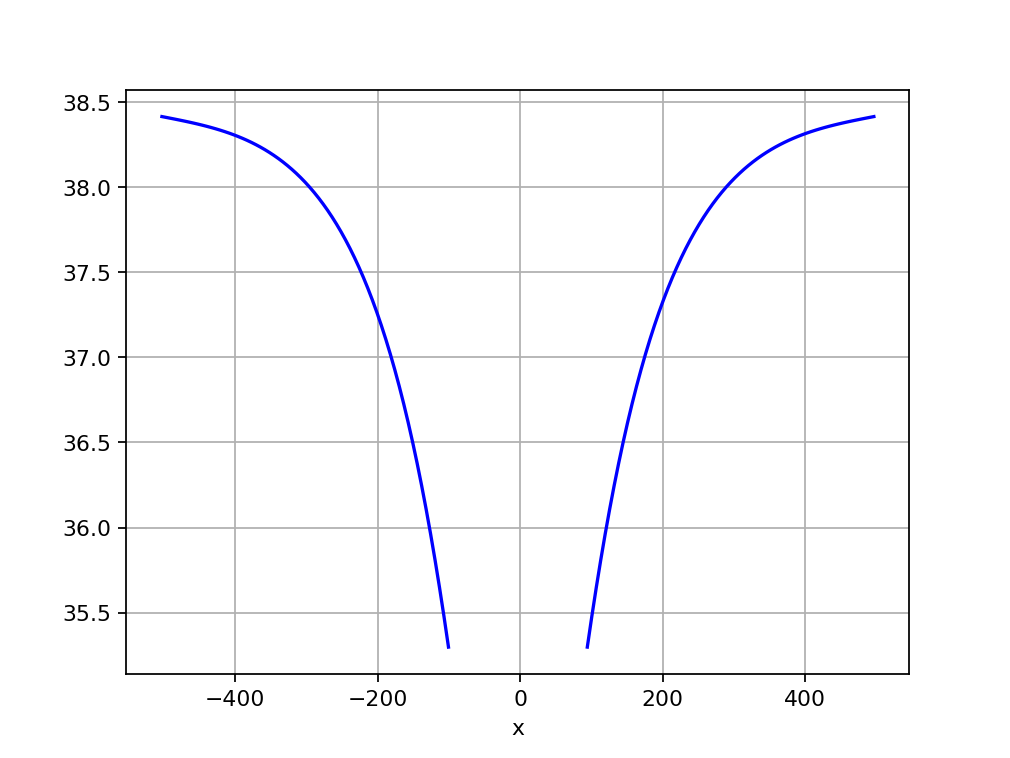

/Users/nesh/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


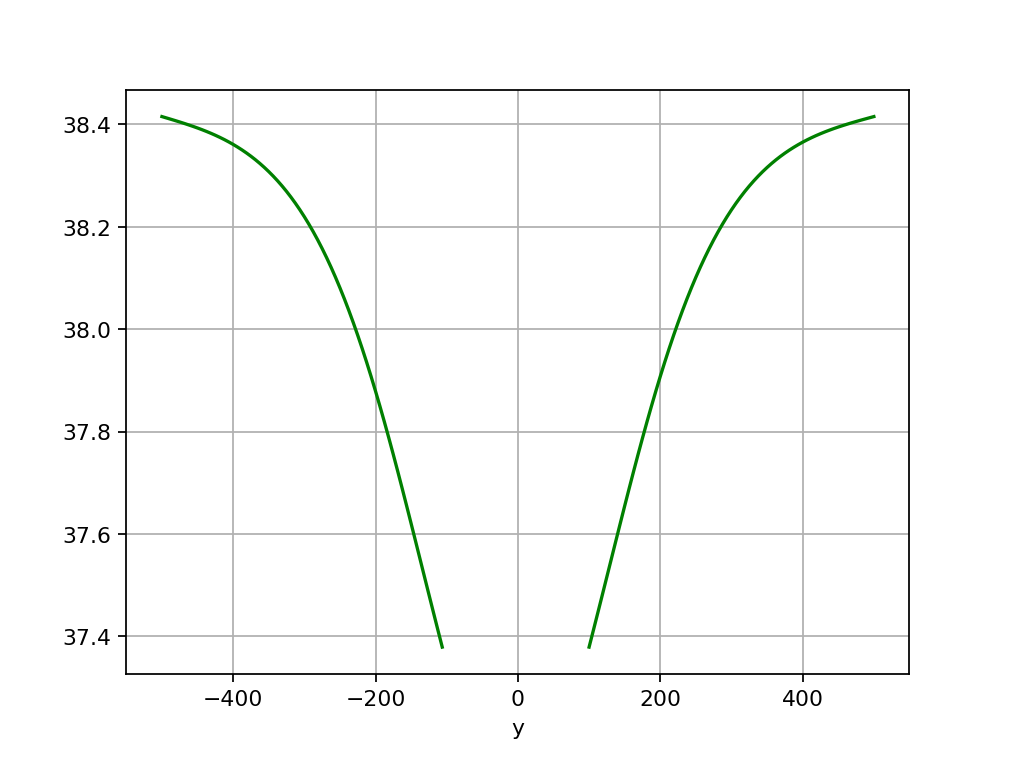

<IPython.core.display.Javascript object>


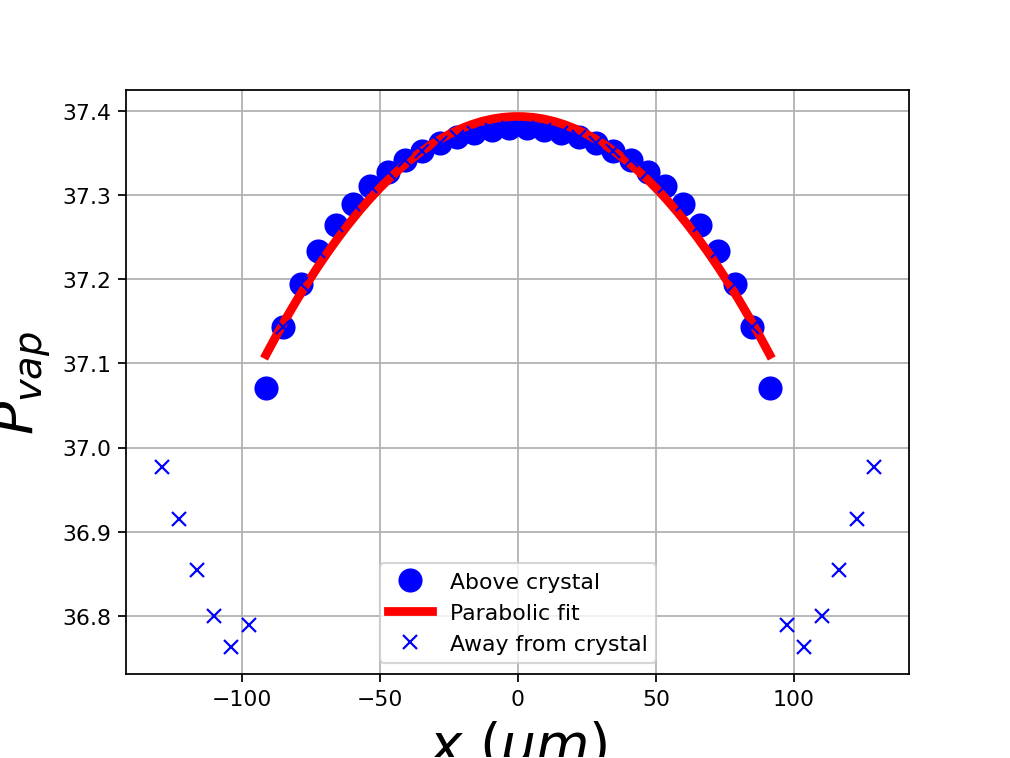

<IPython.core.display.Javascript object>


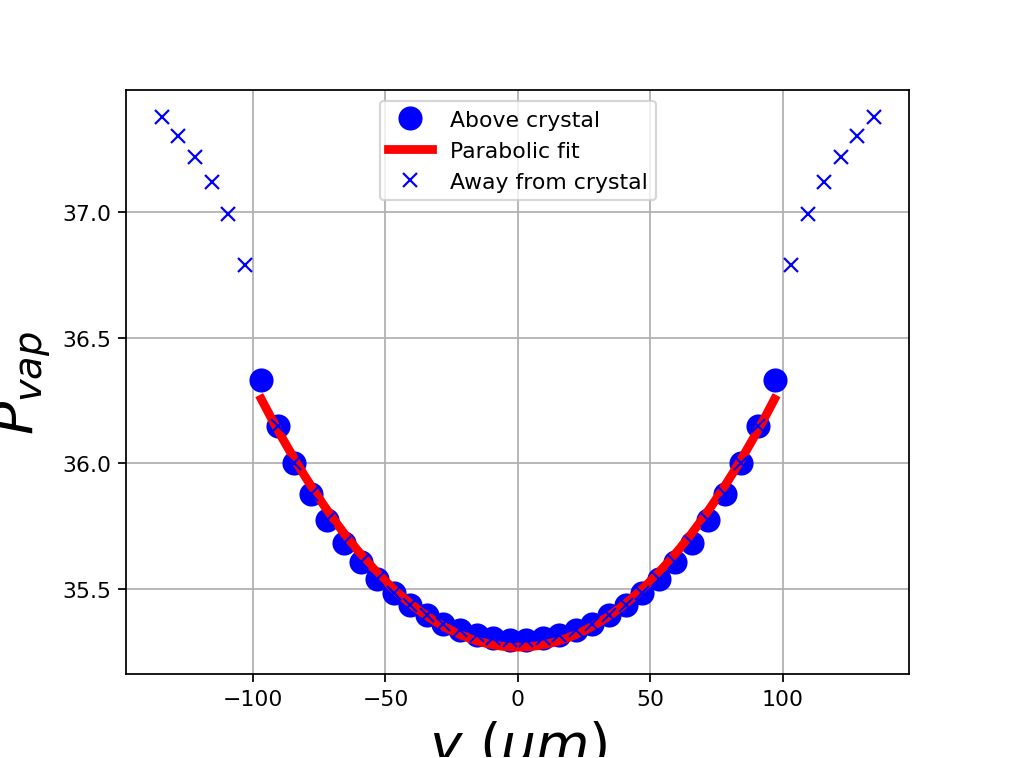

<IPython.core.display.Javascript object>


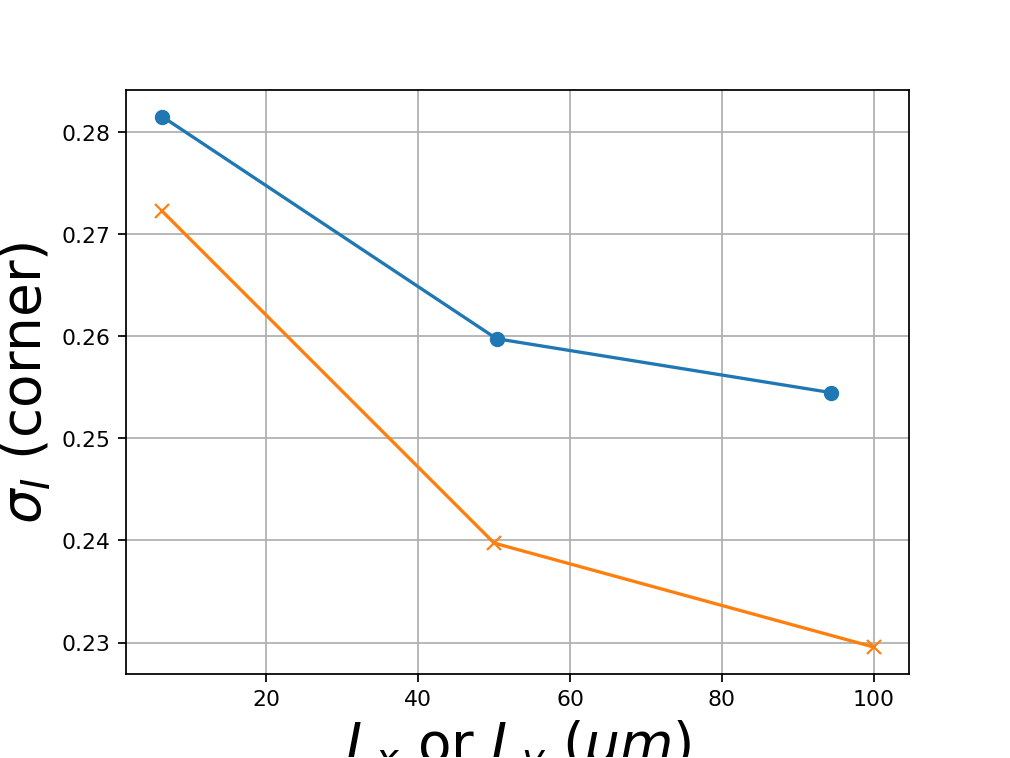

<IPython.core.display.Javascript object>


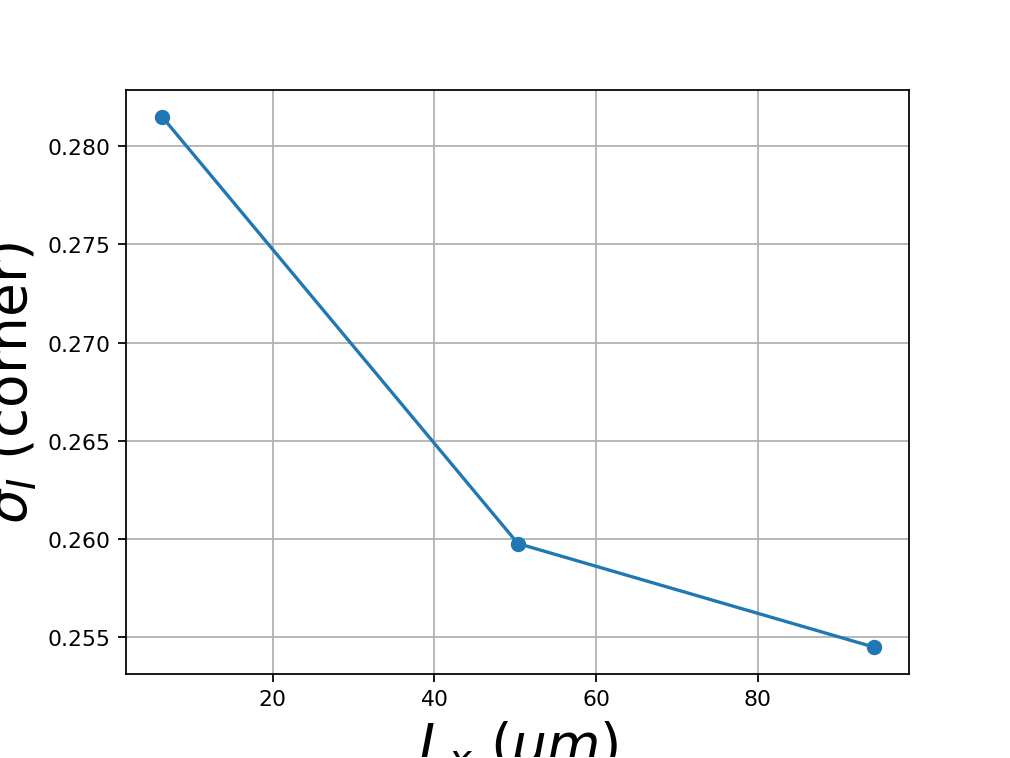

L =  [6.289308176100629 50.314465408805034 94.33962264150944] micrometer
sigmaIcorner(L) =  [0.28151780607040466 0.2597624468053459 0.2544850388836204] dimensionless


<IPython.core.display.Javascript object>


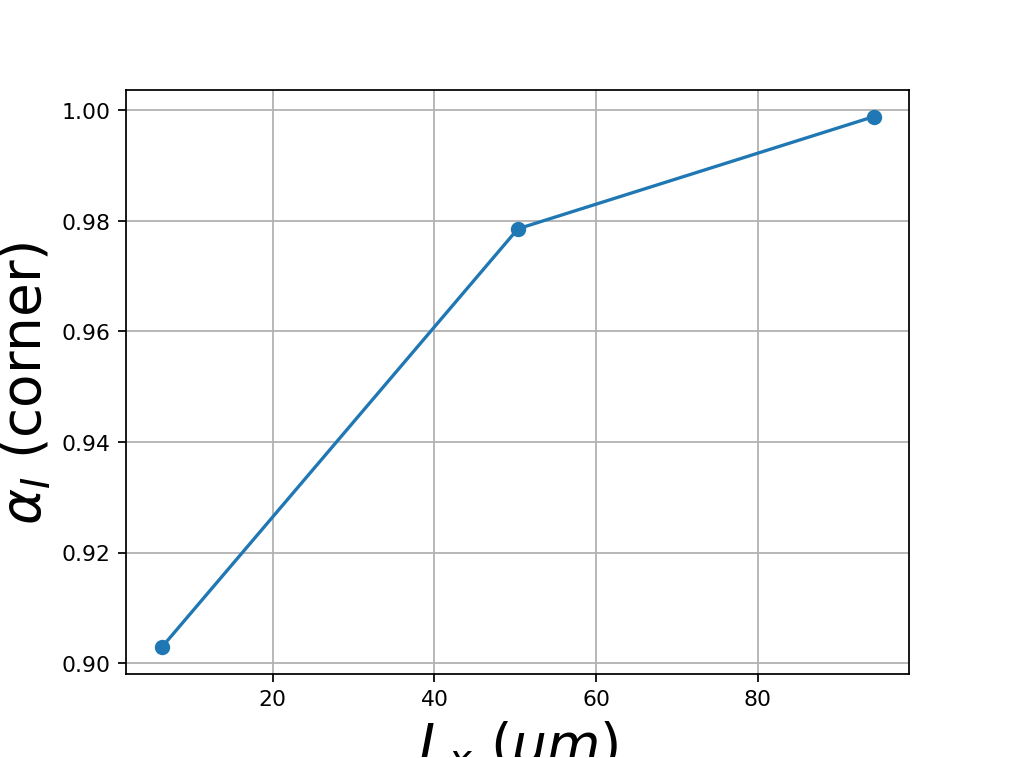

L =  [6.289308176100629 50.314465408805034 94.33962264150944] micrometer
α (I,corner) =  [0.9029008  0.97851962 0.99881177]


<IPython.core.display.Javascript object>


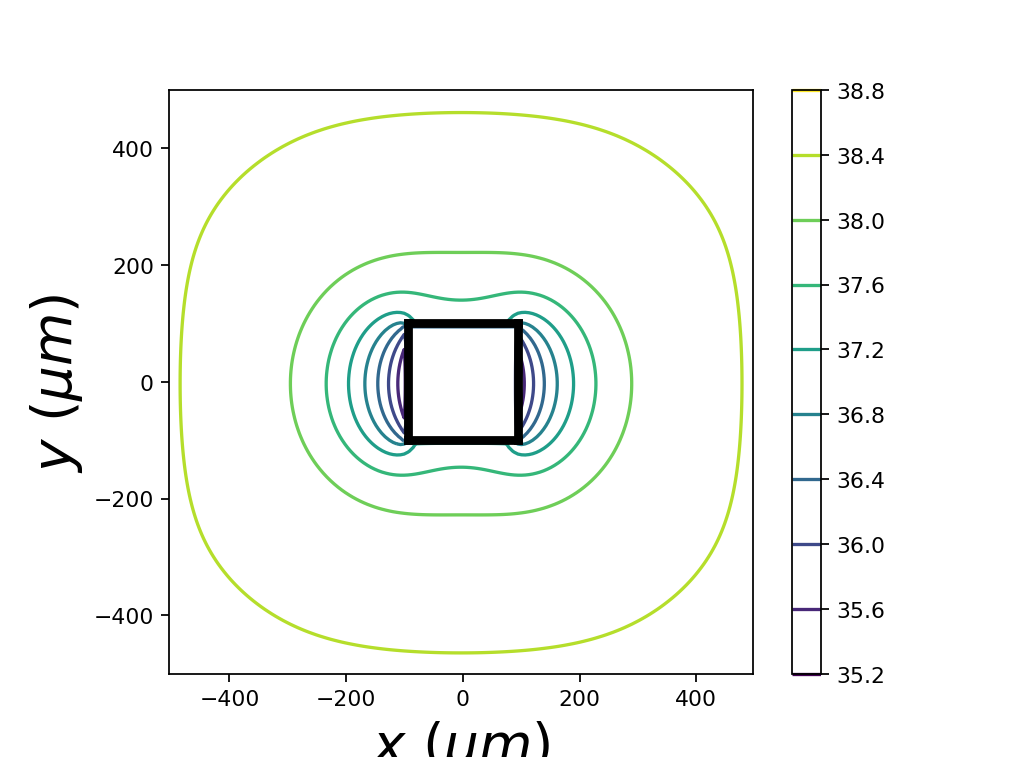

<IPython.core.display.Javascript object>


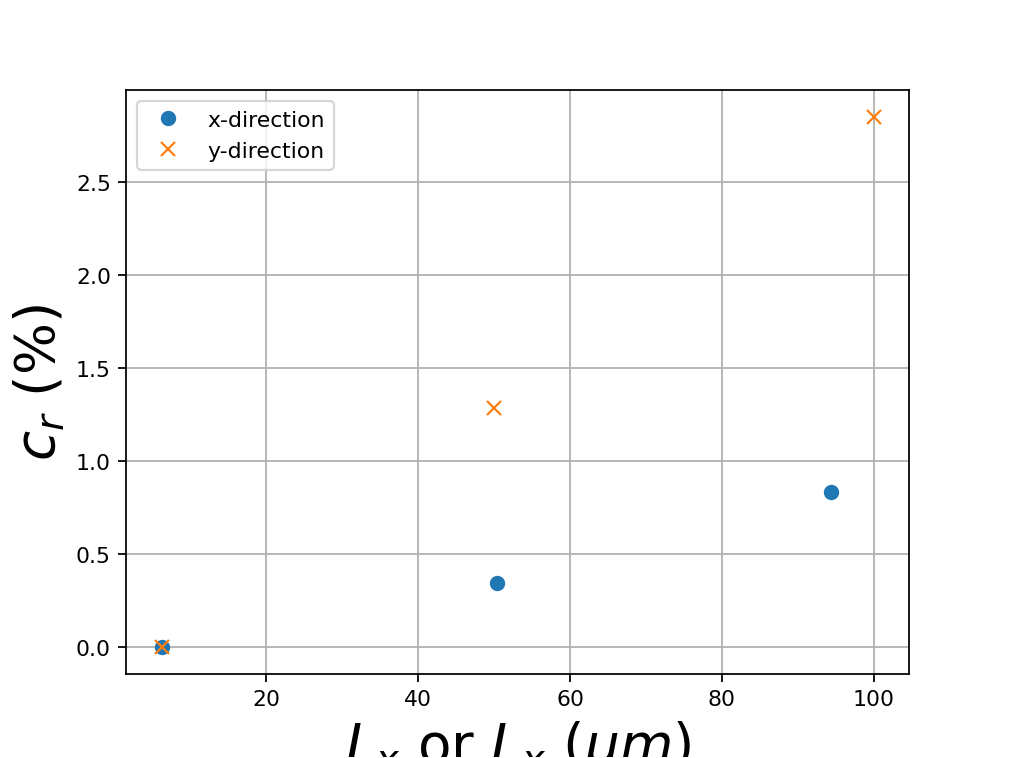

<IPython.core.display.Javascript object>


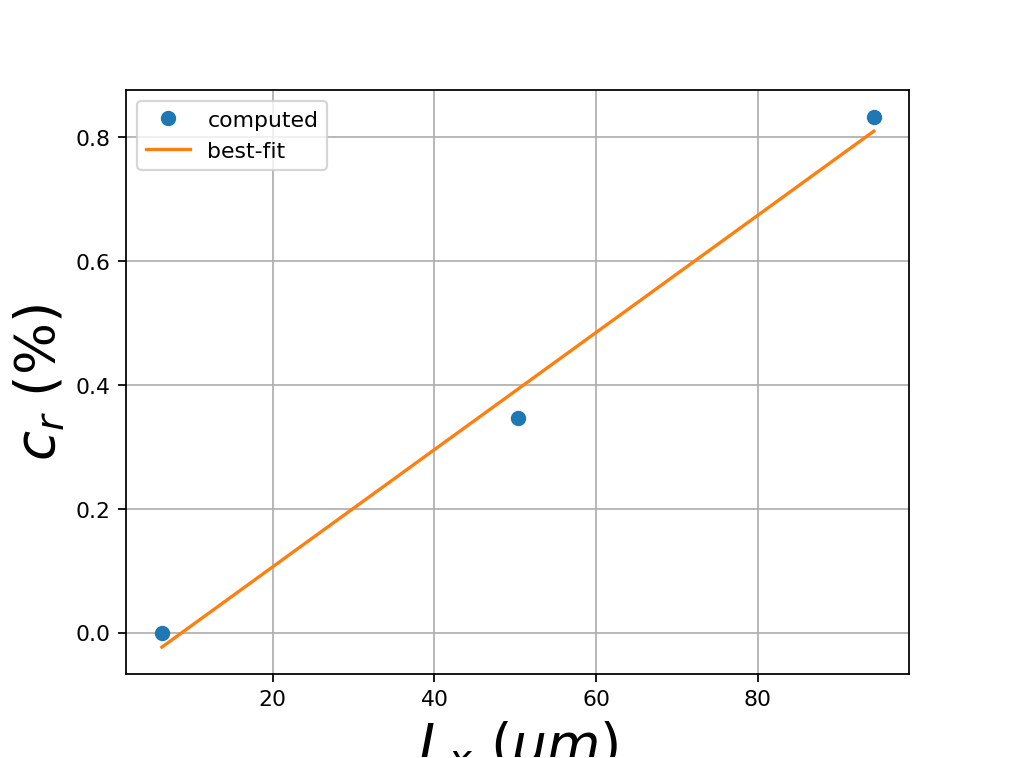

For D =  34908.31943863489 micrometer ** 2 / microsecond
np.flip(px) = [-0.08300763  0.00945786]
if y = mx+b ...
m =  0.009457856202308615
b =  -0.08300762856747669
L_center_reduction =  105.73220596818813
cr (%) =  [0.         0.34581084 0.83276721]


In [10]:
# Time reporting
print('dt, tmax = ',dt, dt*ntimes)

# Reporting on the one of the distances
iwantthisone = -1
uslicex = np.squeeze(uslicex_list[iwantthisone])
uslicey = np.squeeze(uslicey_list[iwantthisone])

# Filling in where the crystal is
VFD.fillin(un,ixbox,iybox)

# Plotting from far afield up to the box
iextend = 6
fontsize = 25
color = 'k'
linewidth = 4
markersize = 10

ixbox_pre = slice(0,ixboxmin)
ixbox_post = slice(ixboxmax,nx)
plt.figure()
plt.plot(x[ixbox_pre], un[ixbox_pre,nymid], 'blue')
plt.plot(x[ixbox_post],un[ixbox_post,nymid],'blue')
plt.xlabel('x')
plt.grid(True)

iybox_pre = slice(0,iyboxmin)
iybox_post = slice(iyboxmax,ny)
plt.figure()
plt.plot(y[iybox_pre], un[nxmid,iybox_pre], 'green')
plt.plot(y[iybox_post],un[nxmid,iybox_post],'green')
plt.xlabel('y')
plt.grid(True)

# This is right above the surface in the x-direction
plt.figure()
xshifted = x[ixbox]-x[nxmid]+dx/2
plt.plot(xshifted,uslicex,'ob',label='Above crystal',lw=linewidth,ms=markersize)
p = np.polyfit(xshifted.magnitude,uslicex.magnitude,2); #print(p)
xshifted_theory = np.linspace(min(xshifted),max(xshifted))
plt.plot(xshifted_theory,np.polyval(p,xshifted_theory.magnitude),'-r',label='Parabolic fit',lw=linewidth)
bigixbox = [ix for ix in range(nxmid-boxradx-iextend,nxmid+boxradx+iextend)]
biguslice = un[bigixbox,nymid+boxrady]
bigxshifted = x[bigixbox]-x[nxmid]+dx/2
plt.plot(bigxshifted,biguslice,'xb', label='Away from crystal',lw=linewidth)
plt.xlabel(r'$x$ ($\mu m$)', fontsize=fontsize)
plt.ylabel(r'$P_{vap}$',fontsize=fontsize)
plt.legend()
plt.grid(True)

# This is right above the surface in the y-direction
plt.figure()
yshifted = y[iybox]-y[nymid]+dy/2
plt.plot(yshifted,uslicey,'ob',label='Above crystal',lw=linewidth,ms=markersize)
p = np.polyfit(yshifted.magnitude,uslicey.magnitude,2); #print(p)
yshifted_theory = np.linspace(min(yshifted),max(yshifted))
plt.plot(yshifted_theory,np.polyval(p,yshifted_theory.magnitude),'-r',label='Parabolic fit',lw=linewidth)
bigiybox = [iy for iy in range(nymid-boxrady-iextend,nymid+boxrady+iextend)]
biguslice = un[nxmid+boxradx,bigiybox]
bigyshifted = y[bigiybox]-y[nymid]+dy/2
plt.plot(bigyshifted,biguslice,'xb', label='Away from crystal',lw=linewidth)
plt.xlabel(r'$y$ ($\mu m$)', fontsize=fontsize)
plt.ylabel(r'$P_{vap}$',fontsize=fontsize)
plt.legend()
plt.grid(True)

# Plotting the surface supersaturation at the corner of the crystal (x and y)
plt.figure()
sigmaDx = uslicex0_list/P_vapor_eq-1
sigmaDy = uslicey0_list/P_vapor_eq-1
plt.plot(Lx_list,sigmaDx,'-o')
plt.plot(Ly_list,sigmaDy,'-x')
plt.xlabel(r'$L_x$ or $L_y$ ($\mu m$)',fontsize=fontsize)
plt.ylabel(r'$\sigma_I$ (corner)',fontsize=fontsize)
plt.grid(True)

# Plotting the surface supersaturation at the corner of the crystal (x only)
plt.figure()
plt.plot(Lx_list,sigmaDx,'-o')
plt.xlabel(r'$L_x$ ($\mu m$)',fontsize=fontsize)
plt.ylabel(r'$\sigma_I$ (corner)',fontsize=fontsize)
print('L = ',Lx_list)
print('sigmaIcorner(L) = ', sigmaDx)
plt.grid(True)

# Plotting the effective alpha at the corner of the crystal
# alphaIcorner = g_icex.magnitude/(sigmaDx.magnitude*nu_kin.magnitude)
alphaIcorner = g_icex_left.magnitude/(sigmaDx.magnitude*nu_kin.magnitude)
plt.figure()
plt.plot(Lx_list,alphaIcorner,'-o')
plt.xlabel(r'$L_x$ ($\mu m$)',fontsize=fontsize)
plt.ylabel(r'$\alpha_I$ (corner)',fontsize=fontsize)
print('L = ',Lx_list)
print('α (I,corner) = ',alphaIcorner)
plt.grid(True)

# Graph as contour plot
fig,ax = plt.subplots()
ax.set_aspect('equal')
CS = ax.contour(x.magnitude,y.magnitude,un.T)
ax.set_xlabel(r'$x$ ($\mu m$)', fontsize=fontsize)
ax.set_ylabel(r'$y$ ($\mu m$)', fontsize=fontsize)
fig.colorbar(CS)
xvec = (x[ixboxmin].magnitude,x[ixboxmin].magnitude)
yvec = (y[iyboxmin].magnitude,y[iyboxmax].magnitude)
plt.plot(xvec,yvec,color=color,linewidth=linewidth)
xvec = (x[ixboxmax].magnitude,x[ixboxmax].magnitude)
yvec = (y[iyboxmin].magnitude,y[iyboxmax].magnitude)
plt.plot(xvec,yvec,color=color,linewidth=linewidth)
xvec = (x[ixboxmin].magnitude,x[ixboxmax].magnitude)
yvec = (y[iyboxmin].magnitude,y[iyboxmin].magnitude)
plt.plot(xvec,yvec,color=color,linewidth=linewidth)
xvec = (x[ixboxmin].magnitude,x[ixboxmax].magnitude)
yvec = (y[iyboxmax].magnitude,y[iyboxmax].magnitude)
plt.plot(xvec,yvec,color=color,linewidth=linewidth)

# The center reduction
plt.figure()
plt.plot(Lx_list,c_rx_percent_list, 'o',label='x-direction')
plt.plot(Ly_list,c_ry_percent_list, 'x',label='y-direction')
plt.xlabel(r'$L_x$ or $L_x$ ($\mu m$)',fontsize=fontsize)
plt.ylabel(r'$c_r$ (%)', fontsize=fontsize)
plt.legend()
plt.grid(True)

# The center reduction
plt.figure()
plt.plot(Lx_list,c_rx_percent_list, 'o',label='computed')
plt.xlabel(r'$L_x$ ($\mu m$)',fontsize=fontsize)
plt.ylabel(r'$c_r$ (%)', fontsize=fontsize)
plt.grid(True)
if len(Lx_list) > 1:
    print('For D = ', D)
    px = np.polyfit(Lx_list.magnitude,c_rx_percent_list,1)
    print('np.flip(px) =', np.flip(px))
    print('if y = mx+b ...')
    print('m = ',px[0])
    print('b = ',px[1])
    print('L_center_reduction = ', 1/px[0])
    plt.plot(Lx_list,plt.polyval(px,Lx_list.magnitude),label='best-fit')
    plt.legend()
print('cr (%) = ', c_rx_percent_list)

In [11]:
import plotly.graph_objects as go

In [12]:
ygrid,xgrid = np.meshgrid(y.magnitude,x.magnitude)
print(np.shape(xgrid))
print(xgrid[0:4,0])
print(ygrid[0,0:4])

(160, 161)
[-503.14465409 -496.85534591 -490.56603774 -484.27672956]
[-500.   -493.75 -487.5  -481.25]


<IPython.core.display.Javascript object>


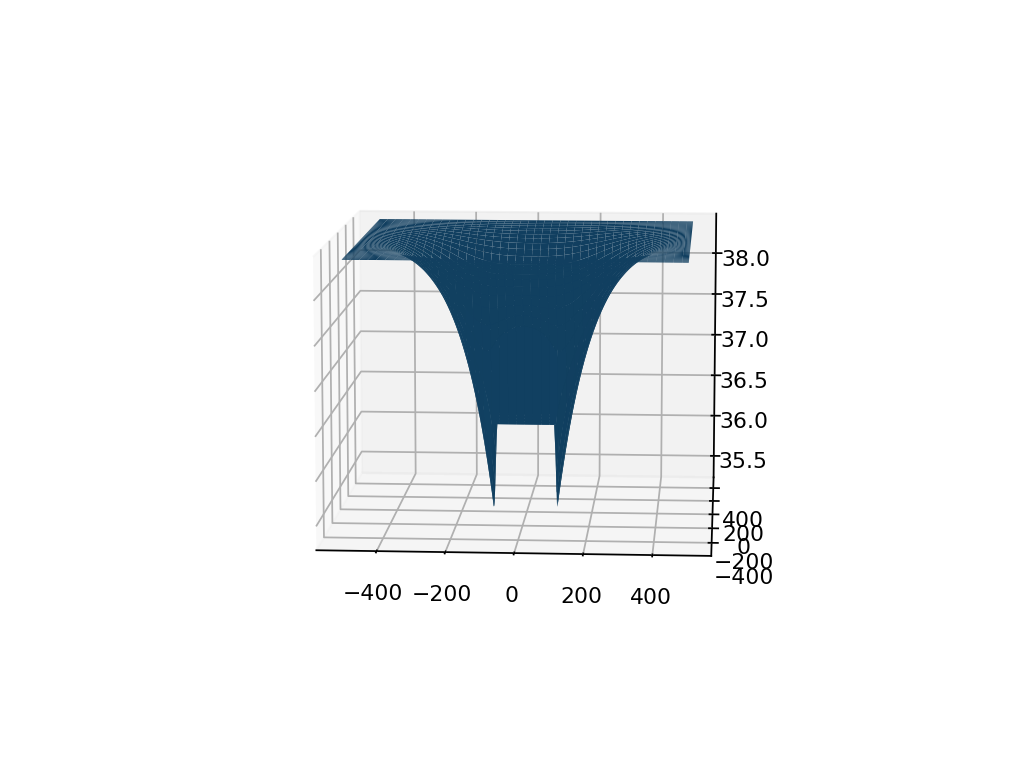

In [13]:
fig = plt.figure() 
ax = plt.axes(projection='3d')
ax.plot_surface(xgrid,ygrid,un)

20
20
[1. 2. 3. 4. 5. 6. 7. 8.]
[1. 2. 3. 4. 5. 6. 7. 8.]


<IPython.core.display.Javascript object>


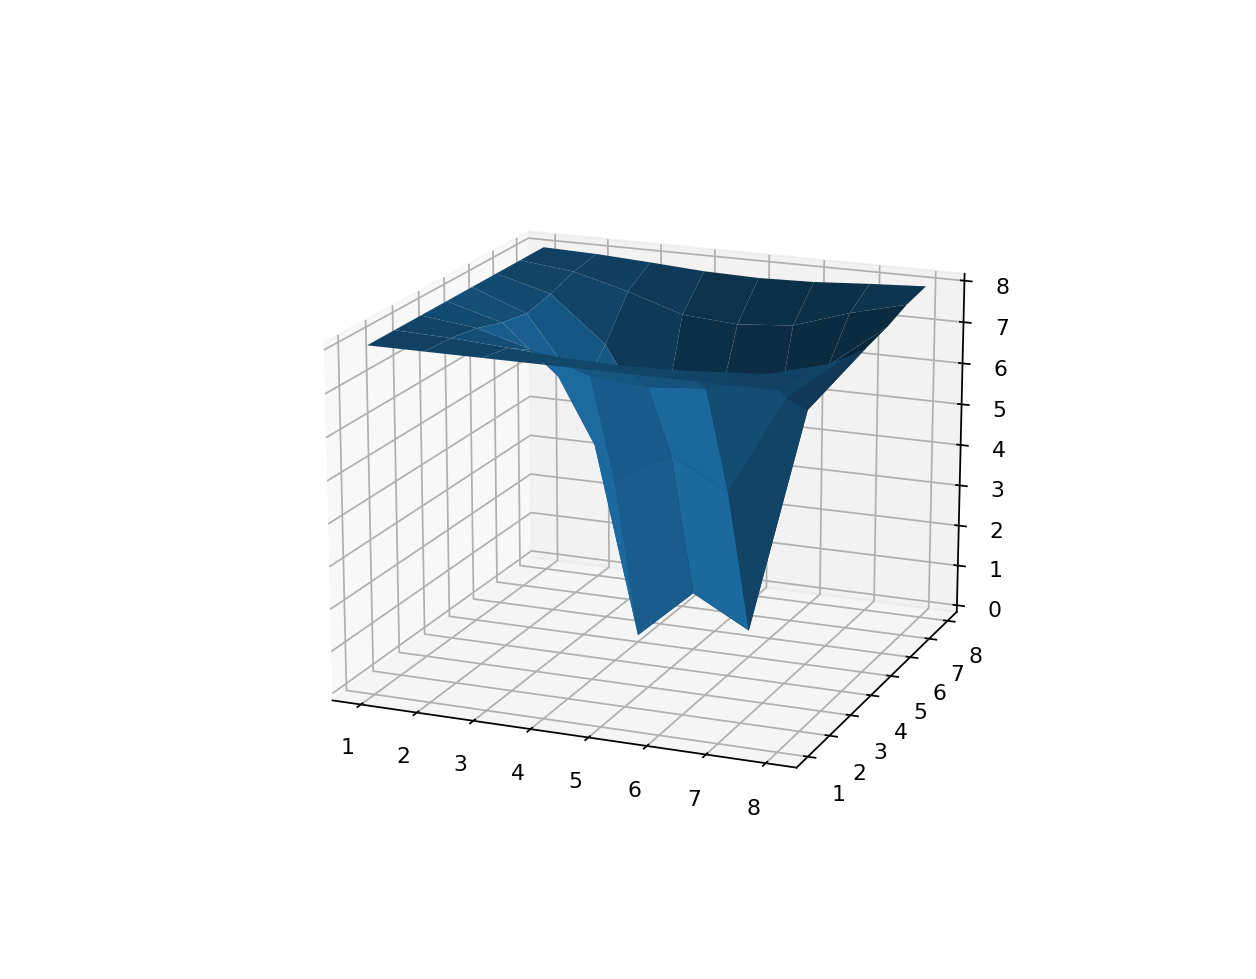

In [39]:
nx_Josh = 8
ny_Josh = 8
ixsamplefactor = int(nx/nx_Josh); print(ixsamplefactor)
iysamplefactor = int(ny/ny_Josh); print(iysamplefactor)

un_Josh = np.zeros((nx_Josh,ny_Josh))
for iy in range(ny_Josh):
    for ix in range(nx_Josh):
        ix_orig = int(ix*ixsamplefactor)
        iy_orig = int(iy*iysamplefactor)
        un_Josh[ix,iy] = un[ix_orig,iy_orig]
un_shift = np.min(un_Josh)
un_Josh -= un_shift
un_scale = 8
un_max = np.max(un_Josh)
un_Josh *= un_scale/un_max

xvec_Josh = np.linspace(1,nx_Josh,nx_Josh); print(xvec_Josh)
yvec_Josh = np.linspace(1,ny_Josh,ny_Josh); print(yvec_Josh)
ygrid_Josh,xgrid_Josh = np.meshgrid(yvec_Josh,xvec_Josh)

fig = plt.figure() 
ax = plt.axes(projection='3d')
ax.plot_surface(xgrid_Josh,ygrid_Josh,un_Josh)

<IPython.core.display.Javascript object>


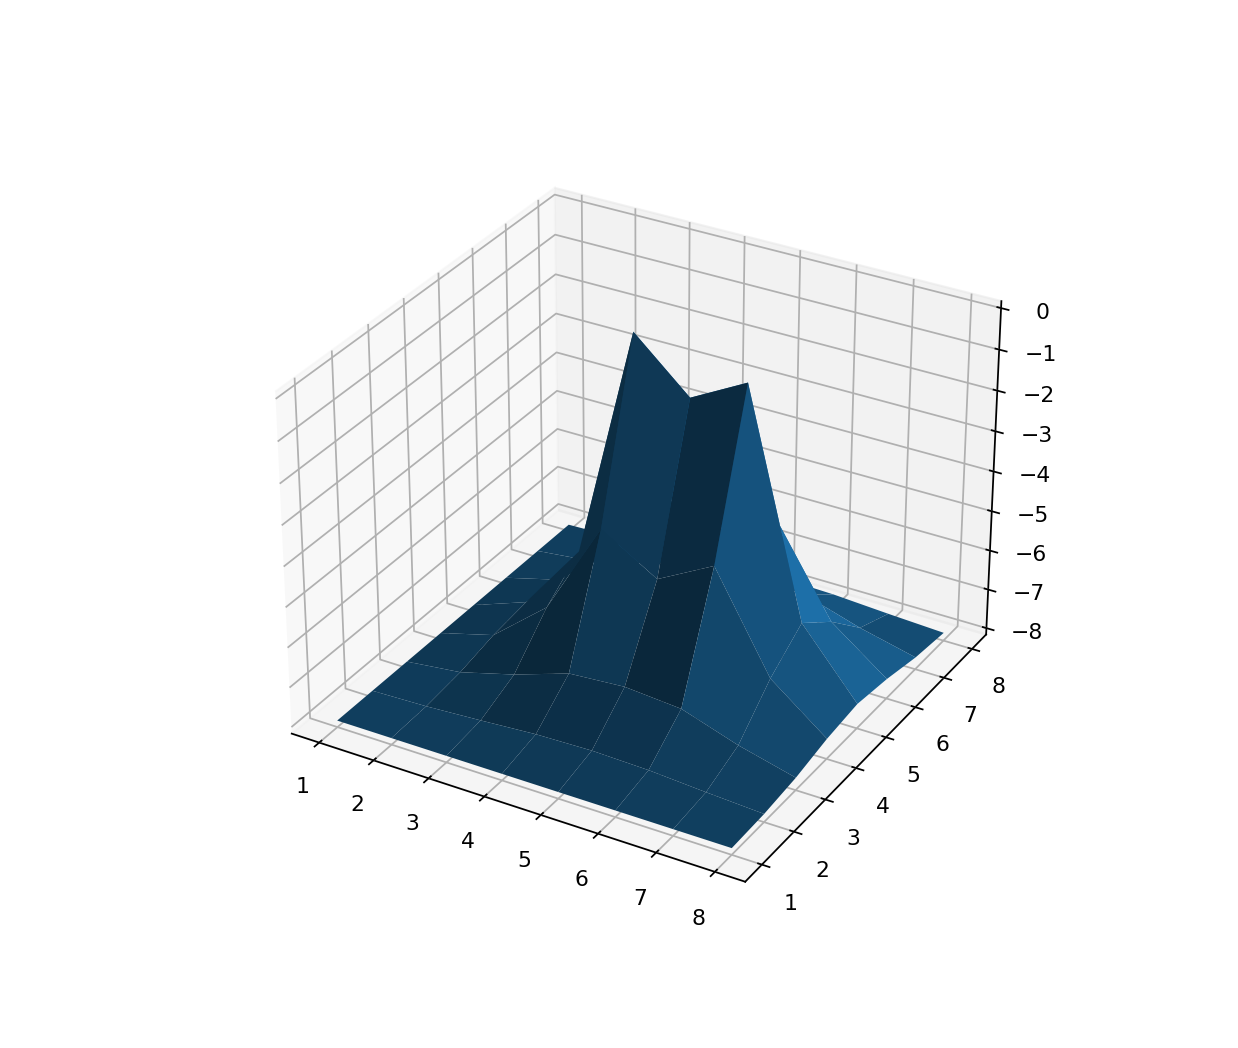

In [41]:
fig = plt.figure() 
ax = plt.axes(projection='3d')
ax.plot_surface(xgrid_Josh,ygrid_Josh,-un_Josh)

In [40]:
for iy in range(ny_Josh):
    print(un_Josh[:,iy])

[8. 8. 8. 8. 8. 8. 8. 8.]
[8.         7.95889504 7.87670988 7.78227975 7.7474335  7.78596543
 7.88174995 7.96175454]
[8.         7.84211013 7.46852263 7.00781045 6.9094693  7.02315454
 7.49322069 7.8537973 ]
[8.         7.62894949 6.49613754 4.12329012 4.95541478 4.21763027
 6.58468267 7.6584068 ]
[8.         7.50451138 5.79186977 0.         1.21001954 0.47601543
 5.93750096 7.54503905]
[8.         7.63992007 6.55384103 4.40425792 5.06843998 4.47994053
 6.63799637 7.66842252]
[8.         7.85067337 7.50128039 7.07387278 6.97669049 7.08829425
 7.52424005 7.86168652]
[8.         7.96191995 7.88624424 7.79936667 7.76698125 7.80277205
 7.89087585 7.96456211]
